**Import necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential,layers
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Read the data**

In [3]:
df=pd.read_csv("/content/drive/MyDrive/movie_data.csv")

In [4]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49969 entries, 0 to 49968
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49969 non-null  object
 1   sentiment  49969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 780.9+ KB


In [6]:
df=df.sample(frac=1)

In [7]:
df.reset_index(drop=True,inplace=True)

In [8]:
df=df[:10000]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [10]:
df.head()

,review,sentiment
0,"This film is bundled along with ""Gli fumavano ...",0
1,"Yes, I am ashamed to admit it, but this show i...",1
2,Whenever people ask me to name the scariest mo...,1
3,"First up this film, according to the slick sai...",0
4,This is a great film. Touching and strong. The...,1


In [11]:
df.isnull().sum()

,0
review,0
sentiment,0


In [12]:
df.duplicated().sum()

15

In [13]:
df.drop_duplicates(keep="first",inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe(include="all")

,review,sentiment
count,9985,9985.000000
unique,9985,NaN
top,"MY Father the hero is sweet, funny and cute. G...",NaN
freq,1,NaN
mean,NaN,0.502153
std,NaN,0.500020
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


**Check for imbalanced data**

<Axes: ylabel='count'>

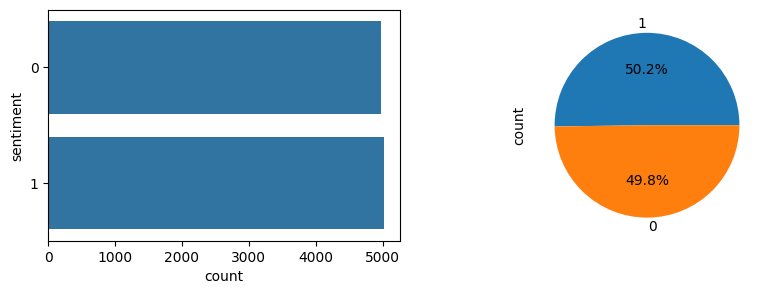

In [16]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
sns.countplot(y = df['sentiment'])
plt.subplot(1,2,2)
df['sentiment'].value_counts().plot.pie(autopct = '%1.1f%%')

**Create a function to Preprocess the review column**

In [17]:
def preprocess(sentence):
    text = re.sub(r'[^a-zA-Z0-9]',' ', sentence).split()
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words]
    word = ' '.join(word)
    return word

**Apply the function in the review column**

In [18]:
df['review'] = df['review'].apply(preprocess)

**Print reviews after preprocess**

In [19]:
for i in range(5):
  print(df['review'][i])
  print()

this film bundle along gli fumavano le colt lo chiamavano camposanto film leave lot desire way dvd print first film dark occasionally make hard see exactly happen second neither film subtitle force watch dub film though il prezzo del potere seem better dub personally i always prefer subtitle non purists problem these dvd problems however fault original film makers indifferent package market four decades later br br as film assassination president garfield this major problem van johnson look much like garfield judy garland in way whatsoever look like garfield he miss beard wrong hair color style even close way trust i american history teacher pay know sort things the real life garfield civil war general look like guy smith brothers cough drop box plus use actor provide voice johnson dub surreal never since van johnson sound quite macho he fine actor certainly convince general macho president br br in addition stupid cast president garfield death way like film it obvious film makers actu

**Split the dataset into Input (X) & Target (y) variable**

In [20]:
X=df['review']
y=df['sentiment']

**Create Keras tokenizer object with 5000 max words**

In [21]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
vocab_size = len(tokenizer.word_index)+1

def text_encoding(text):
    encoded_docs = tokenizer.texts_to_sequences(text)
    padded_sequence = pad_sequences(encoded_docs,maxlen = 128)
    return padded_sequence

X = text_encoding(X)

**Split the dataset into Training & Testing set**

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

**Check the shape of X_train,X_test,y_train,y_test**

In [24]:
print('Shape of X_train :',X_train.shape)
print('Shape of X_test :',X_test.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_test :',y_test.shape)

Shape of X_train : (6989, 128)
Shape of X_test : (2996, 128)
Shape of y_train : (6989,)
Shape of y_test : (2996,)


**Create keras Sequential Model with LSTM Layers**

In [25]:
model = Sequential()

model.add(layers.Embedding(vocab_size, 128))
model.add(layers.LSTM(128, return_sequences = True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(128))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation ='sigmoid'))

**Compile the model**

In [26]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy',metrics =['accuracy'])

****Train the model with our training set****

In [27]:
model.fit(X_train,y_train,epochs = 10, validation_split = 0.1)

Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.6397 - loss: 0.6085 - val_accuracy: 0.8555 - val_loss: 0.3287
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9275 - loss: 0.2021 - val_accuracy: 0.8526 - val_loss: 0.3533
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9804 - loss: 0.0731 - val_accuracy: 0.8369 - val_loss: 0.4803
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9886 - loss: 0.0348 - val_accuracy: 0.8584 - val_loss: 0.5968
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9971 - loss: 0.0113 - val_accuracy: 0.8340 - val_loss: 0.8137
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9959 - loss: 0.0118 - val_accuracy: 0.8340 - val_loss: 0.8151
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9990 - loss: 0.0062 - val_accuracy: 0.8426 - val_loss: 1.0261
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9968 - loss: 0.0115 - val_acc

**Evaluate the model**

In [28]:

model.evaluate(X_train,y_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9968 - loss: 0.0119


[0.08692187070846558, 0.9815424084663391]

**predict the model**

In [29]:

y_pred = model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [30]:
y_pred[:5]

array([[9.9999082e-01],
       [3.4034724e-04],
       [9.9999499e-01],
       [1.4153802e-04],
       [1.4129430e-03]], dtype=float32)

In [31]:
y_pred = (y_pred > 0.5).astype(int)

In [32]:

y_pred[:5]

array([[1],
       [0],
       [1],
       [0],
       [0]])

**Accuracy of the model**

In [33]:
accuracy_score(y_test,y_pred)

0.8277703604806409

**Confusion matrix**

<Axes: >

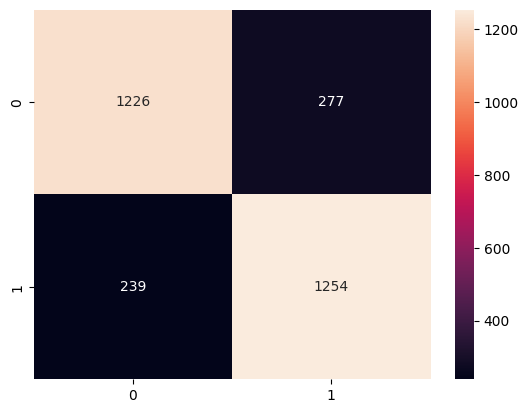

In [34]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')


**classification report**

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1503
           1       0.82      0.84      0.83      1493

    accuracy                           0.83      2996
   macro avg       0.83      0.83      0.83      2996
weighted avg       0.83      0.83      0.83      2996

